# Introduction

For this project, you will act as a data researcher for the World Health Organization. You will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.  

During this project, you will analyze, prepare, and plot data, and seek to answer questions in a meaningful way.

After you perform analysis, you'll be creating an article with your visualizations to be featured in the fictional "Time Magazine".

**Focusing Questions**: 
+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expactancy in these nations?
+ What is the distribution of that life expectancy?

GDP Source:[World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD)national accounts data, and OECD National Accounts data files.

Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


## Step 1. Import Python Modules

Import the modules that you'll be using in this project:
- `from matplotlib import pyplot as plt`
- `import pandas as pd`
- `import seaborn as sns`

In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

## Step 2 Prep The Data

To look for connections between GDP and life expectancy you will need to load the datasets into DataFrames so that they can be visualized.

In [4]:
df=pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Step 3 Examine The Data

The datasets are large and it may be easier to view the entire dataset locally on your computer. You can open the CSV files directly from the folder you downloaded for this project.

Let's learn more about our data:
- GDP stands for **G**ross **D**omestic **P**roduct. GDP is a monetary measure of the market value of all final goods and services produced in a time period. 
- The GDP values are in current US dollars.

What six countries are represented in the data?

In [69]:
countries = df['Country'].unique()
print(f"The countries are {', '.join(i for i in countries)}")

The countries are Chile, China, Germany, Mexico, United States of America, Zimbabwe


What years are represented in the data?

In [73]:
years = df['Year'].unique()
print(f"Years are {', '.join(str(i) for i in years)}.")

Years are 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015.


## Step 4 Tweak The DataFrame

Look at the column names of the DataFrame 

In [7]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


What do you notice? The first two column names are one word each, and the third is five words long! `Life expectancy at birth (years)` is descriptive, which will be good for labeling the axis, but a little difficult to wrangle for coding the plot itself. 

**Revise The DataFrame Part A:** 

Use Pandas to change the name of the last column to `LEABY`.

In [8]:
df.rename(columns={'Life expectancy at birth (years)': 'LEABY'}, inplace=True)

Run `df.head()` again to check your new column name worked.

In [9]:
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


---

## Step 5 Bar Charts To Compare Average

To take a first high level look at both datasets, create a bar chart for each DataFrame:

A) Create a bar chart from the data in with Country and GDP

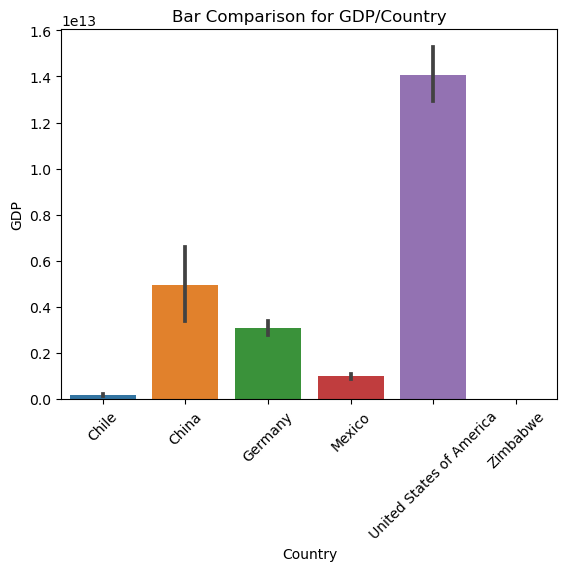

In [33]:
sns.barplot(x="Country", y="GDP", data=df)
plt.xticks(rotation=45)
plt.title("Bar Comparison for GDP/Country")
plt.show()

B) Create a bar chart using the data in DF with Country and LEABY

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Chile'),
  Text(1, 0, 'China'),
  Text(2, 0, 'Germany'),
  Text(3, 0, 'Mexico'),
  Text(4, 0, 'United States of America'),
  Text(5, 0, 'Zimbabwe')])

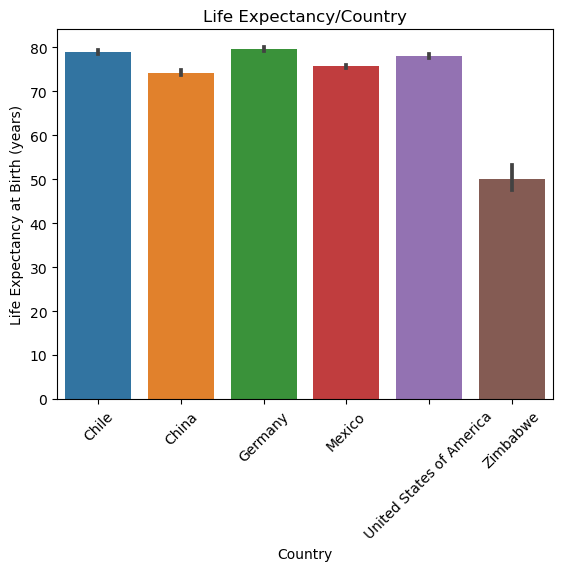

In [34]:
sns.barplot(x="Country", y="LEABY", data=df)
plt.ylabel("Life Expectancy at Birth (years)")
plt.title("Life Expectancy/Country")
plt.xticks(rotation=45)

What do you notice about the two bar charts? Do they look similar?

In [ ]:
# Very distinct, there is little correlation between GDP and Life Expectancy.1

## Step 6. Violin Plots To Compare Life Expectancy Distributions 

Another way to compare two datasets is to visualize the distributions of each and to look for patterns in the shapes.

We have added the code to instantiate a figure with the correct dimmensions to observe detail. 
1. Create a violin plot for the dataframe and plot Country and LEABY

Text(0.5, 1.0, 'Life Expectancy per Country')

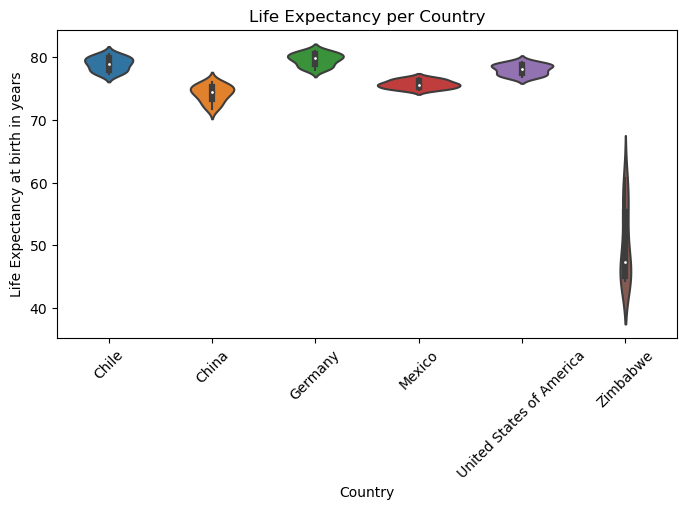

In [27]:
plt.figure(figsize=(8,4))
sns.violinplot(x="Country", y="LEABY", data=df)
plt.xticks(rotation=45)
plt.ylabel("Life Expectancy at birth in years")
plt.title("Life Expectancy per Country")

What do you notice about this distribution? Which country's life expactancy has changed the most?

In [76]:
print("Zimbabwes life expectancy has changed the most, as indicated by the spread and shape of its violin plot")

Zimbabwes life expectancy has changed the most, as indicated by the spread and shape of its violin plot


## Step 7. Bar Plots Of GDP and Life Expectancy over time

We want to compare the GDPs of the countries over time, in order to get a sense of the relationship between GDP and life expectancy. 

Text(0, 0.5, 'GDP in Trillions of US Dollars')

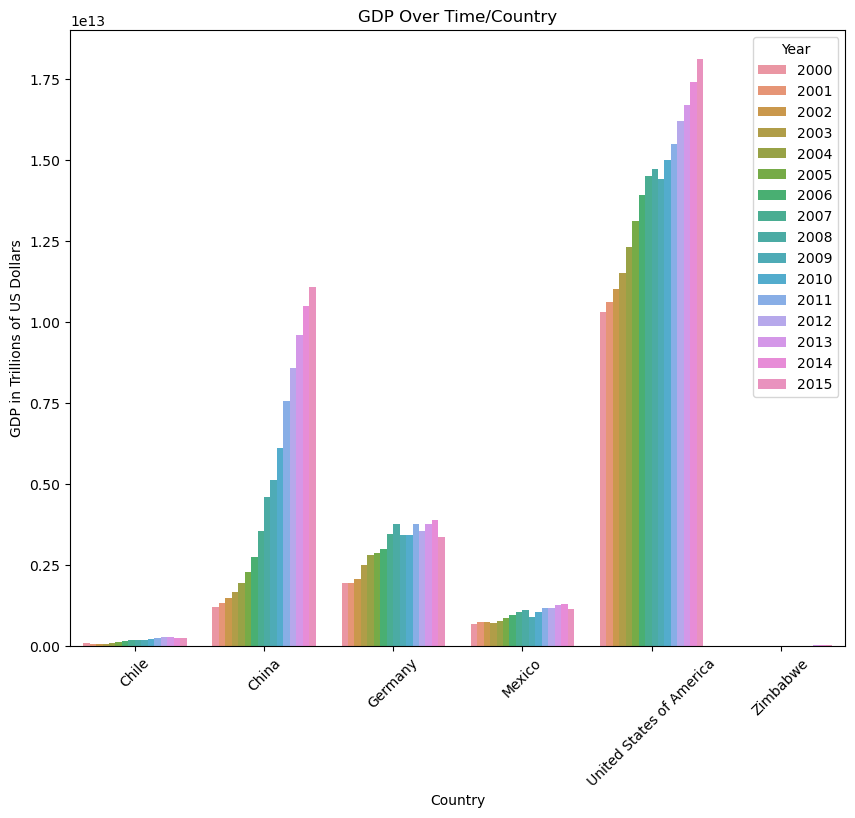

In [35]:
ax = plt.subplots(figsize=(10, 8))
ax = sns.barplot(x="Country", y="GDP", data=df, hue="Year")
plt.xticks(rotation=45)
plt.title("GDP Over Time/Country")
plt.ylabel("GDP in Trillions of US Dollars")

Now that we have plotted a barplot that clusters GDP over time by Country, let's do the same for Life Expectancy.

Text(0.5, 1.0, 'Life Expectancy Over Time/Country')

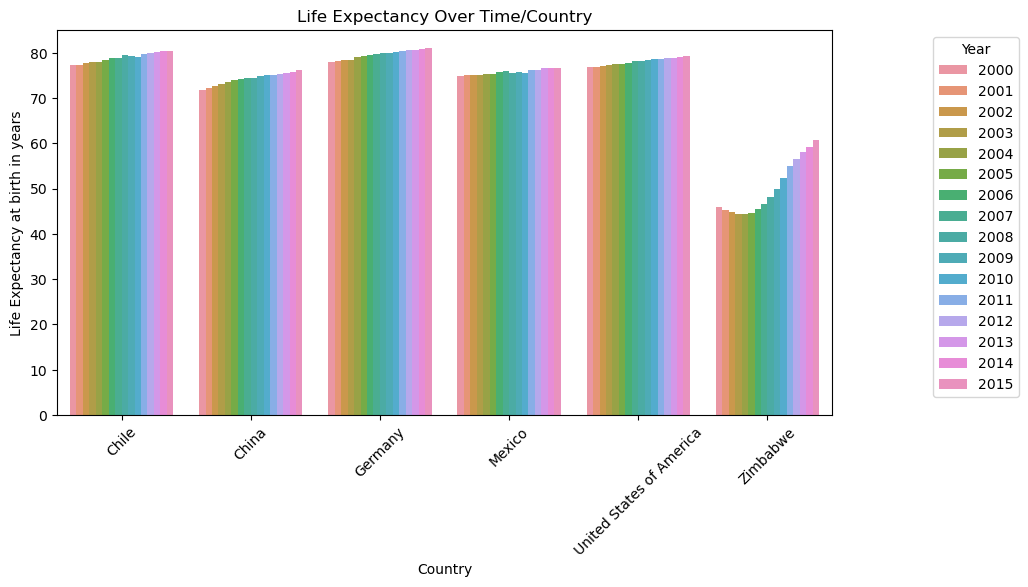

In [36]:
ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x="Country", y="LEABY", data=df, hue="Year")
plt.xticks(rotation=45)
plt.legend(title='Year', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.ylabel("Life Expectancy at birth in years")
plt.title("Life Expectancy Over Time/Country")

What are your first impressions looking at the visualized data?

- Which countries' bars changes the most?
- What years are there the biggest changes in the data?
- Which country has had the least change in GDP over time? 
- How do countries compare to one another?
- Now that you can see the both bar charts, what do you think about the relationship between GDP and life expectancy?
- Can you think of any reasons that the data looks like this for particular countries?

In [78]:
print("The data suggests a significant link between a countrys economic status and its life expectancy with richer countries generally enjoying higher and more stable life expectancy rates. Zimbabwe highlights the impact of socio-economic challenges on public health.")

The data suggests a significant link between a countrys economic status and its life expectancy with richer countries generally enjoying higher and more stable life expectancy rates. Zimbabwe highlights the impact of socio-economic challenges on public health.


## Step 8. Scatter Plots of GDP and Life Expectancy Data

To create a visualization that will make it easier to see the possible correlation between GDP and life expectancy, you can plot each set of data on its own subplot, on a shared figure.

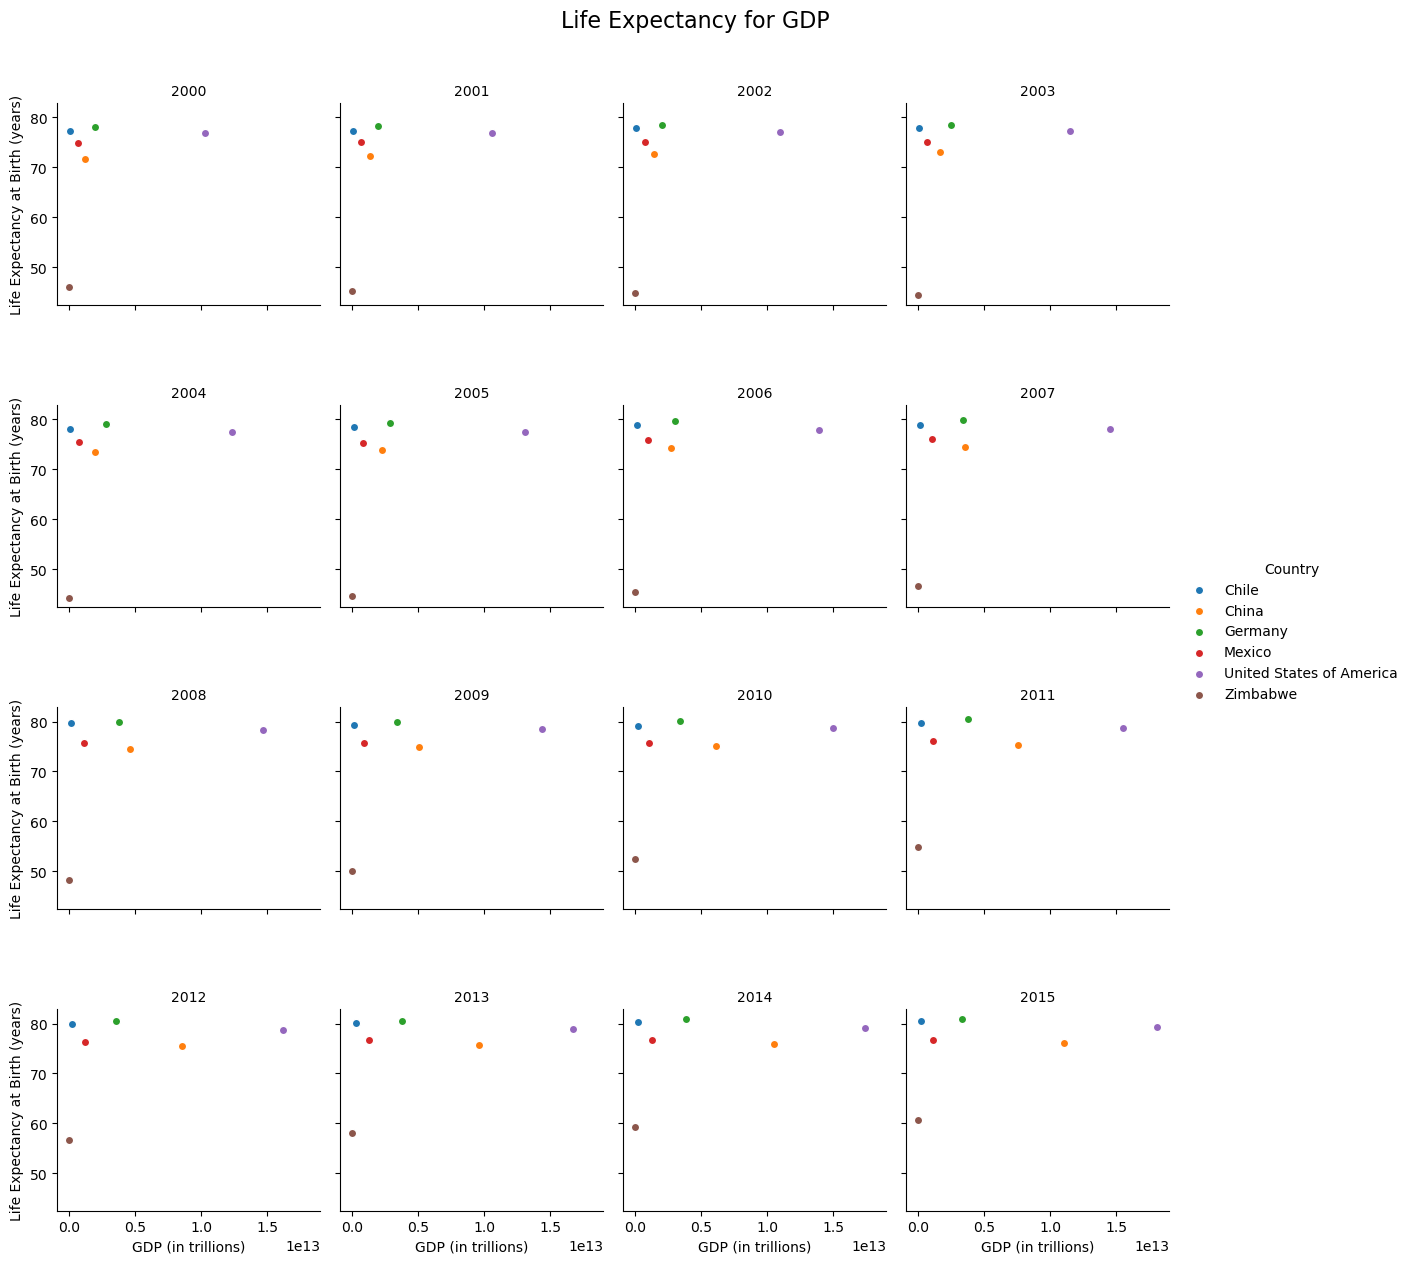

In [45]:
g = sns.FacetGrid(df, col="Year", hue="Country", col_wrap=4, height=3)
g = g.map(plt.scatter, "GDP", "LEABY", edgecolor="w").add_legend()
g.set_axis_labels("GDP (in trillions)", "Life Expectancy at Birth (years)")
g.set_titles("{col_name}")
g.fig.suptitle("Life Expectancy for GDP", y=1.05, fontsize=16)
g.fig.subplots_adjust(hspace=0.5)

+ Which country moves the most along the X axis over the years?
+ Which country moves the most along the Y axis over the years?
+ Is this surprising?
+ Do you think these scatter plots are easy to read? Maybe there's a way to plot that! 

In [80]:
print("China shows the most significant movement along the X-axis, reflecting its rapid GDP growth over the years. Zimbabwe exhibits the greatest change along the Y-axis, indicating fluctuations in life expectancy due to various socio-economic challenges. However, the scatter plots, can be difficult to interpret due to the separation by years and the lack of connected data points. Improving the visualization with line plots or combined plots could make the trends over time more apparent and easier to understand.")

China shows the most significant movement along the X-axis, reflecting its rapid GDP growth over the years.Zimbabwe exhibits the greatest change along the Y-axis, indicating fluctuations in life expectancy due to various socio-economic challenges.These findings align with expectations: China's economic boom is well-documented, and Zimbabwe's life expectancy has been impacted by political and health crises.However, the scatter plots, while informative, can be difficult to interpret due to the separation by years and the lack of connected data points. Improving the visualization with line plots or combined plots could make the trends over time more apparent and easier to understand.


## Step 9. Line Plots for Life Expectancy

In the scatter plot grid above, it was hard to isolate the change for GDP and Life expectancy over time. 
It would be better illustrated with a line graph for each GDP and Life Expectancy by country. 

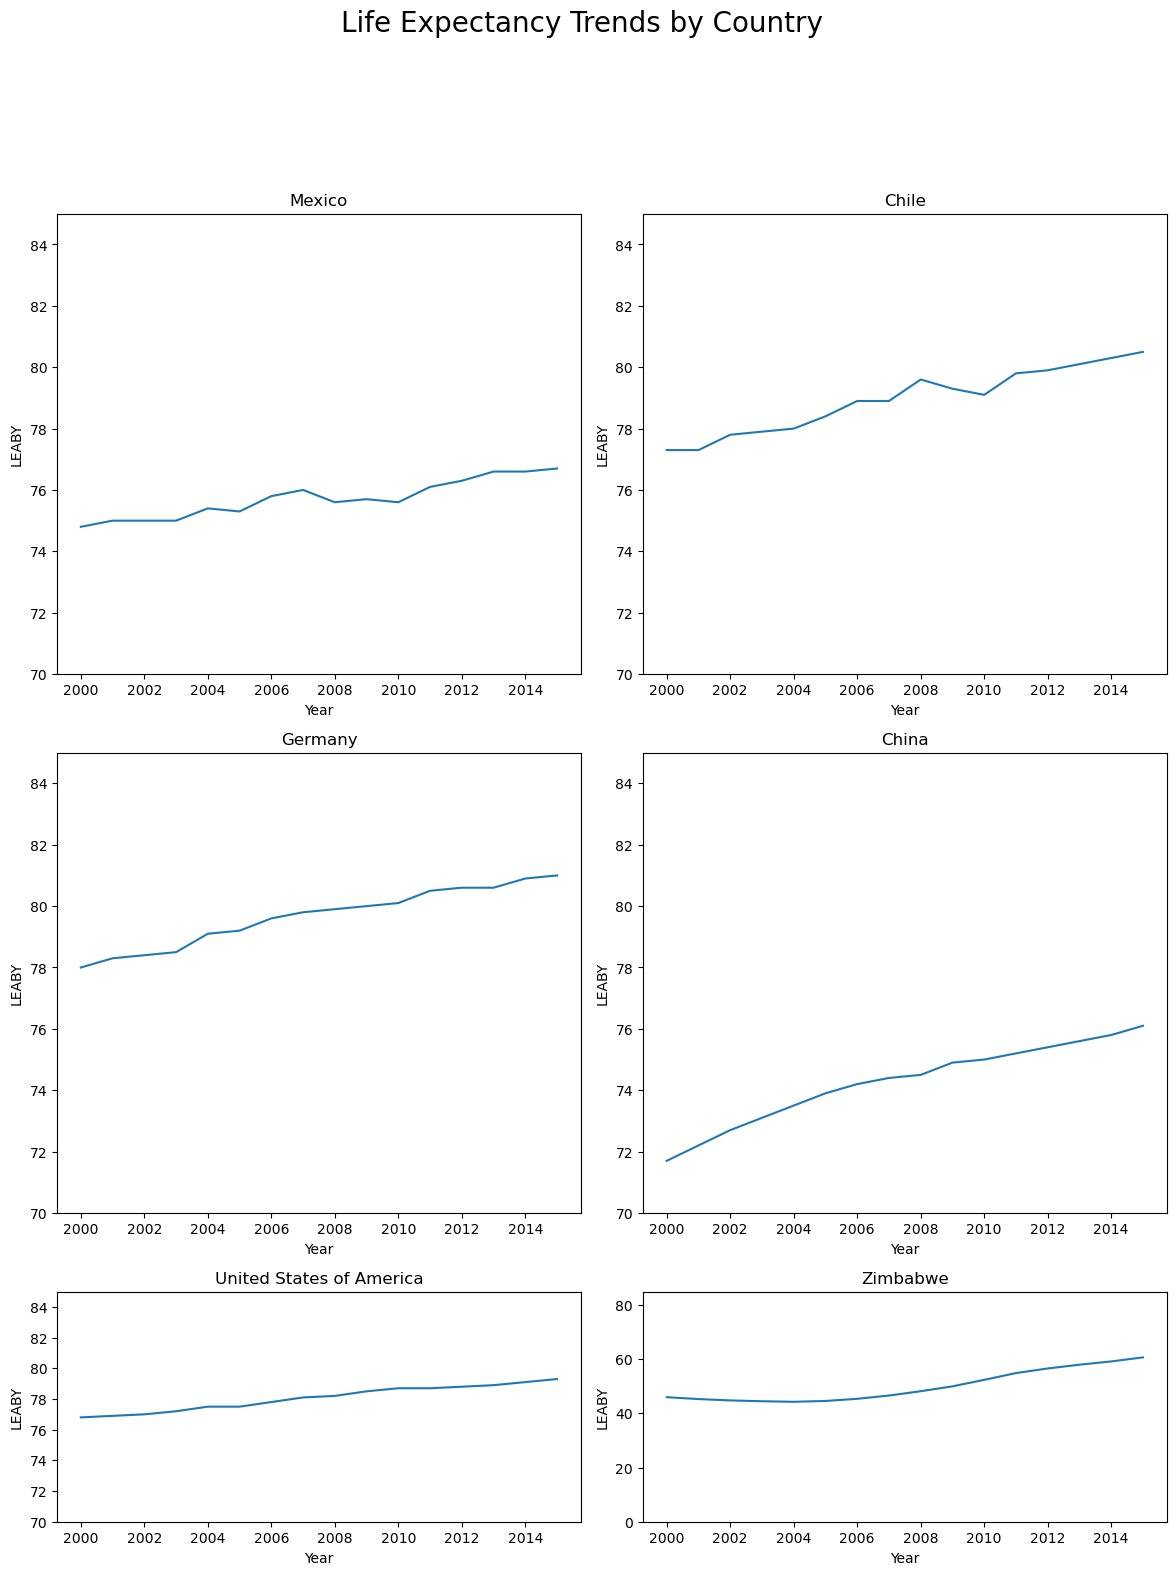

In [64]:
countries = ["Mexico", "Chile", "Germany", "China", "United States of America", "Zimbabwe"]

fig, axes = plt.subplots(4, 2, figsize=(12, 18), gridspec_kw={'height_ratios': [1, 1, 0.5, 0.5]})
axes = axes.flatten()

for i, (country, ax) in enumerate(zip(countries, axes)):
    sns.lineplot(data=df[df['Country'] == country], x='Year', y='LEABY', ax=ax)
    ax.set_title(country)
    
    ax.set_ylim(70, 85) if country != "Zimbabwe" else ax.set_ylim(0, 85)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

for j in range(len(countries), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Life Expectancy Trends by Country", y=1.02, fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])

What are your first impressions looking at the visualized data?
- Which countries' line changes the most?
- What years are there the biggest changes in the data?
- Which country has had the least change in life expectancy over time? 
- Can you think of any reasons that the data looks like this for particular countries?

In [81]:
print("China shows the most significant movement along the X-axis, reflecting its rapid GDP growth over the years.Zimbabwe exhibits the greatest change along the Y-axis, indicating fluctuations in life expectancy due to various socio-economic challenges.These findings align with expectations: China's economic boom is well-documented, and Zimbabwe's life expectancy has been impacted by political and health crises.However, the scatter plots, while informative, can be difficult to interpret due to the separation by years and the lack of connected data points. Improving the visualization with line plots or combined plots could make the trends over time more apparent and easier to understand.")

China shows the most significant movement along the X-axis, reflecting its rapid GDP growth over the years.Zimbabwe exhibits the greatest change along the Y-axis, indicating fluctuations in life expectancy due to various socio-economic challenges.These findings align with expectations: China's economic boom is well-documented, and Zimbabwe's life expectancy has been impacted by political and health crises.However, the scatter plots, while informative, can be difficult to interpret due to the separation by years and the lack of connected data points. Improving the visualization with line plots or combined plots could make the trends over time more apparent and easier to understand.


## Step 10. Line Plots for GDP

Let's recreate the same FacetGrid for GDP now. Instead of Life Expectancy on the Y axis, we now we want GDP.

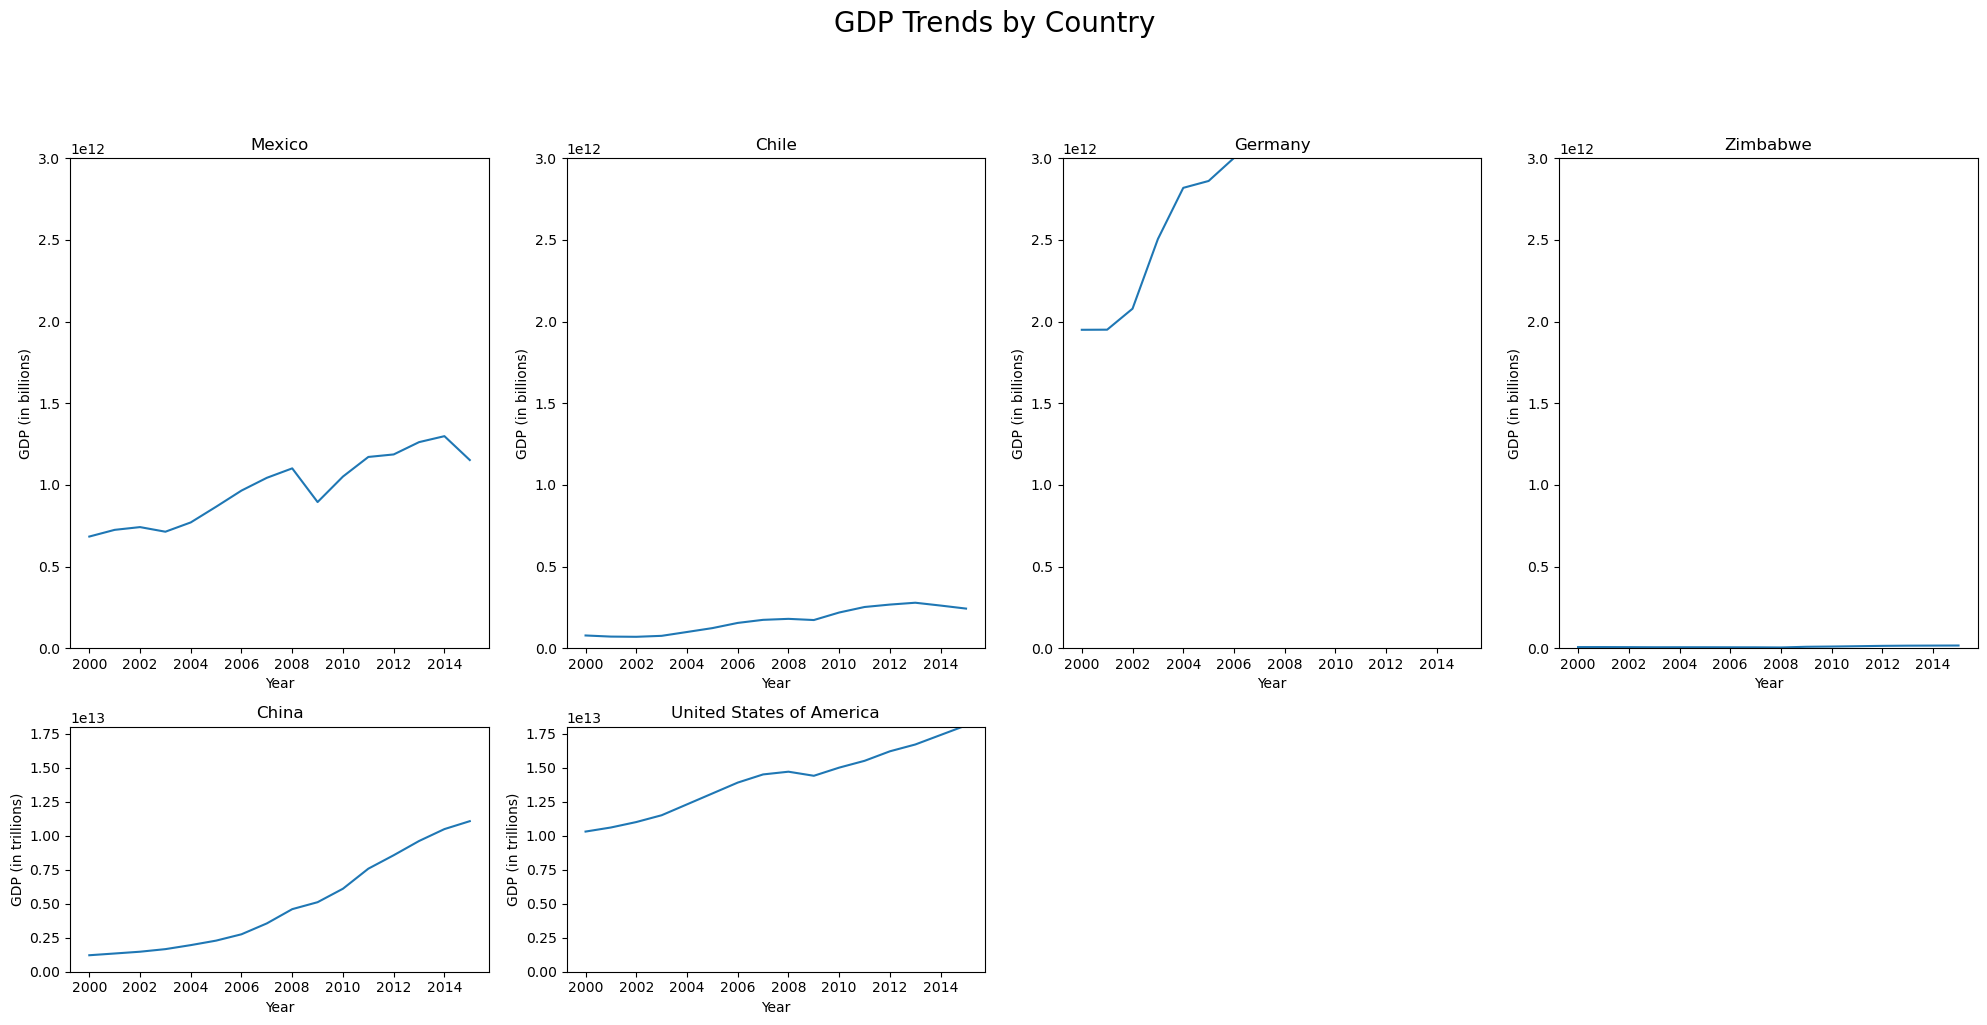

In [62]:
top_countries = ["Mexico", "Chile", "Germany", "Zimbabwe"]
bottom_countries = ["China", "United States of America"]
top_df = df[df['Country'].isin(top_countries)]
bottom_df = df[df['Country'].isin(bottom_countries)]

fig, axes = plt.subplots(2, 4, figsize=(20, 10), gridspec_kw={'height_ratios': [1, 0.5]})
axes = axes.flatten()

for i, country in enumerate(top_countries):
    ax = axes[i]
    sns.lineplot(data=top_df[top_df['Country'] == country], x='Year', y='GDP', ax=ax)
    ax.set_title(country)
    ax.set_ylim(0, 3e12)  
    ax.set_ylabel('GDP (in billions)')

for i, country in enumerate(bottom_countries):
    ax = axes[i + 4] 
    sns.lineplot(data=bottom_df[bottom_df['Country'] == country], x='Year', y='GDP', ax=ax)
    ax.set_title(country)
    ax.set_ylim(0, 1.8e13)  
    ax.set_ylabel('GDP (in trillions)') 

for j in range(6, 8):
    fig.delaxes(axes[j])
for ax in axes:
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

fig.suptitle("GDP Trends by Country", y=1.02, fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])

Which countries have the highest and lowest GDP?

In [84]:
print("The United States has the highest GDP, followed closely by China. Both countries show significant economic growth over the years. Zimbabwe on the other hand has the lowest GDP, very little growth over the observed period; which is evident from its flat line on the GDP trend graph.")

The United States has the highest GDP, followed closely by China. Both countries show significant economic growth over the years. Zimbabwe on the other hand has the lowest GDP, very little growth over the observed period; which is evident from its flat line on the GDP trend graph.


Which countries have the highest and lowest life expectancy?

In [85]:
print("Countries like Germany, Chile, and the United States have the highest life expectancy, with stable trends around 80 years. However, again Zimbabwe has the lowest life expectancy, although it shows an upward trend over the years, it started from a much lower base compared to the other countries.")

Countries like Germany, Chile, and the United States have the highest life expectancy, with stable trends around 80 years. However, again Zimbabwe has the lowest life expectancy, although it shows an upward trend over the years, it started from a much lower base compared to the other countries.
